In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

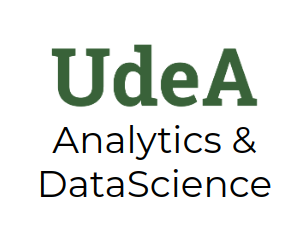

In [2]:
Image('../docs/udea-datascience.png')

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Posgrado en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

# Análisis de Datos Cualitativos

In [3]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches

import scipy.stats
from pandas import crosstab # Generador de tablas de contingencia
from scipy.stats import fisher_exact # Test exacto de Fisher
from scipy.stats import chisquare # Test Chi-Cuadrada
from sklearn.metrics import mutual_info_score # Información Mutua

In [4]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/adult.data"
download = requests.get(url).content
columnas = ['age', 'workclass', 'fnlwgt', 'education', 
            'education-num', 'marital-status', 'occupation', 
            'relationship', 'race', 'gender', 'capital-gain', 
            'capital-loss', 'hours-per-week', 'native-country', 
            'income']

data = pd.read_table(
    io.StringIO(download.decode('utf-8')),
    sep=',',
    names=columnas, 
    decimal=',', 
    header=None) 

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Distribución Marginal

Para calcular las distribuciones marginales, vamos a seleccionar para nuestro ejemplo práctico las columnas **education** y **marital-status** (Es importante trabajar con datos categóricos para calcular las distribuciones marginales y condicionales)

In [5]:
datos_select = data[['education','marital-status']]
datos_select.head()

,education,marital-status
0,Bachelors,Never-married
1,Bachelors,Married-civ-spouse
2,HS-grad,Divorced
3,11th,Married-civ-spouse
4,Bachelors,Married-civ-spouse


En el siguiente apartado, se mostrará como se crea una tabla de contingencia a partir de **datos_select**. Dicha tabla nos permitirá calcular las probabilidades marginales y posteriormente, las probabilidades condicionales.

Veamos como se construye una tabla de contingencia con **datos_select**

### Creando un tabla de contingencia

**Una tabla de contingencia**, condicionado por filas de valores marginales y columna de sumas de valores, es una representación de la partición de una muestra poblacional de dos o más categorías y entre dos o más clasificaciones, como se muestra en la tabla ejemplo:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|


In [6]:
Categorias_Education = pd.Categorical(datos_select['education']).unique()
Categorias_marital = pd.Categorical(datos_select['marital-status']).unique()

In [7]:
Categorias_Education

[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ..., ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
Length: 16
Categories (16, object): [' 10th', ' 11th', ' 12th', ' 1st-4th', ..., ' Masters', ' Preschool', ' Prof-school', ' Some-college']

In [8]:
Categorias_marital

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Categories (7, object): [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']

In [9]:
contingencia_education_marital = pd.crosstab(
    datos_select['education'], 
    datos_select['marital-status']
)

In [10]:
#contingencia_education_marital['Total'] = contingencia_education_marital.sum(axis=1)
contingencia_education_marital

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
education,,,,,,,
10th,120,0,349,15,361,49,39
11th,130,0,354,19,586,48,38
12th,39,0,130,8,232,14,10
1st-4th,10,0,81,12,39,9,17
5th-6th,20,0,172,20,89,18,14
7th-8th,73,0,359,14,113,23,64
9th,64,0,230,9,155,33,23
Assoc-acdm,203,2,460,12,337,30,23
Assoc-voc,234,1,689,13,362,42,41


### Aplicación de la distribución marginal con una tabla de contingencia

La distribución marginal es una relación entre dos variables aleatorias discretas, $X$ e $Y$, que se define como una función $f(x,y)$, tal que la sumatoria de dos funciones $g(x)$ y $h(y)$ son distribuciones de probabilidad conjuntas, es decir:

$$g(x) = \sum_{x} f(x,y)$$

$$h(y) = \sum_{y} f(x,y)$$

Por lo general, este tipo de distribución son **bivariadas**, lo cual se puede representar mediante una matriz. La matriz de probabilidades permite sumar las probabilidades de una variable $x$ y sumar las probabilidades de otra variable $y$, permitiendo analizar dos eventos independientes para tomar una decisión.

### Ejemplo de la distribución marginal con una tabla de contingencia basado en valores de producción de café

In [11]:
Cafe_Especial = np.array([120, 400, 160, 199])
Cafe_Premium = np.array([50, 85, 81, 69])
Conjunto_Cafecitos = np.vstack((Cafe_Especial, Cafe_Premium))
Empresas = ['San Alberto', 'Delolita', 'Al alma', 'Revolucion']
Tipo = ['Cafe Especial','Cafe Premium']

Datos = pd.DataFrame(data=Conjunto_Cafecitos, columns=Empresas, index=Tipo)
Datos

,San Alberto,Delolita,Al alma,Revolucion
Cafe Especial,120,400,160,199
Cafe Premium,50,85,81,69


In [12]:
suma_Filas = Conjunto_Cafecitos.sum(axis=1)
suma_Columnas = Conjunto_Cafecitos.sum(axis=0)

suma_Filas_Cafe = pd.DataFrame(
    suma_Filas, 
    index = Tipo, 
    columns=['Suma Filas'])

suma_Columnas_Cafe = pd.DataFrame(
    suma_Columnas, 
    index=Empresas, 
    columns=['Suma Columnas'])

display(suma_Filas_Cafe)
display(suma_Columnas_Cafe)

,Suma Filas
Cafe Especial,879
Cafe Premium,285


,Suma Columnas
San Alberto,170
Delolita,485
Al alma,241
Revolucion,268


In [13]:
Suma_Total_Columnas = suma_Columnas.sum()
Suma_Total_Filas = suma_Filas.sum()
print('Suma total de filas y columnas = {:.3f} y {:.3f}'.format(Suma_Total_Filas, Suma_Total_Columnas))

Suma total de filas y columnas = 1164.000 y 1164.000


Si queremos saber la probabilidad que las empresas de café tengan disponible ambos tipos de café, realizamos la siguiente operación:

In [14]:
Prob_Marginal = suma_Columnas / Suma_Total_Columnas
Resultados_Empresas = pd.DataFrame(
    data = Prob_Marginal, 
    index = Empresas,
    columns = ['Probabilidad Marginal'])

display(Resultados_Empresas)

,Probabilidad Marginal
San Alberto,0.146048
Delolita,0.416667
Al alma,0.207045
Revolucion,0.230241


Si queremos saber la probabilidad de disponibilidad de algún tipo de café, considerando todas las empresas, entonces realizamos el siguiente cálculo:

In [15]:
Prob_Marginal_Cafes = suma_Filas / Suma_Total_Filas
Resultados_Cafes = pd.DataFrame(
    data = Prob_Marginal_Cafes, 
    index = Tipo, 
    columns = ['Probabilidad Marginal'])

display(Resultados_Cafes)

,Probabilidad Marginal
Cafe Especial,0.755155
Cafe Premium,0.244845


¿El cálculo de las probabilidades cumplen con la propiedad que las suma de todas las probabilidades marginales es igual a 1? Verifiquemos si se cumple con dicha propiedad.

In [16]:
print("La suma de las probabilidades marginales de las empresas de café es: ", Resultados_Empresas.sum())
print("La suma de las probabilidades marginales de los tipos de café es: ", Resultados_Cafes.sum())

La suma de las probabilidades marginales de las empresas de café es:  Probabilidad Marginal    1.0
dtype: float64
La suma de las probabilidades marginales de los tipos de café es:  Probabilidad Marginal    1.0
dtype: float64


*Conclusión:* se observa que hay mayor probabilidad de comprar café tipo especial o premium en la empresa Delolita y hay mayor disponibilidad de café especial en todas las empresas de café.

### Aplicación de la distribución marginal con la tabla de contingencia generada desde la base de datos

Considerando la tabla de contingencia que se construyo con la base de datos inicial, **contingencia_education_marital**, utilizamos la misma estrategía vista en el anterior ejemplo para calcular las probabilidades marginales:

In [17]:
suma_Filas = contingencia_education_marital.sum(axis = 1)
suma_Columnas = contingencia_education_marital.sum(axis = 0)
print(suma_Filas)
print('\n')
print(suma_Columnas)

education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
dtype: int64


marital-status
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10683
 Separated                 1025
 Widowed                    993
dtype: int64


In [18]:
suma_Filas_education_marital = pd.DataFrame(suma_Filas, columns=['Suma Filas'])
suma_Columnas_education_marital = pd.DataFrame(suma_Columnas, columns=['Suma Columnas'])

display(suma_Filas_education_marital.sort_values(by = ['Suma Filas'], ascending = True)) # Organizamos de menor a mayor
display(suma_Columnas_education_marital.sort_values(by = ['Suma Columnas'], ascending = True)) # Organizamos de menor a mayor

,Suma Filas
education,
Preschool,51
1st-4th,168
5th-6th,333
Doctorate,413
12th,433
9th,514
Prof-school,576
7th-8th,646
10th,933


,Suma Columnas
marital-status,
Married-AF-spouse,23
Married-spouse-absent,418
Widowed,993
Separated,1025
Divorced,4443
Never-married,10683
Married-civ-spouse,14976


In [19]:
Suma_Total_Columnas = suma_Columnas.sum()
Suma_Total_Filas = suma_Filas.sum()
print('Suma total de filas y columnas = {:.3f} y {:.3f}'.format(Suma_Total_Filas, Suma_Total_Columnas))

Suma total de filas y columnas = 32561.000 y 32561.000


Si queremos saber la probabilidad de los encuestados de acuerdo al nivel de educación, realizamos la siguiente operación:

In [20]:
Prob_Marginal_education = suma_Filas / Suma_Total_Filas
Resultados_education = pd.DataFrame(
    data = Prob_Marginal_education, 
    columns = ['Probabilidad Marginal'])

display(Resultados_education)

,Probabilidad Marginal
education,
10th,0.028654
11th,0.036086
12th,0.013298
1st-4th,0.005160
5th-6th,0.010227
7th-8th,0.019840
9th,0.015786
Assoc-acdm,0.032769
Assoc-voc,0.042443


**Conclusión 1:** el 32.2% de los encuestados tienen nivel de educación *HS-grad* y el 22.39% de los encuestados tienen nivel de educación *Some-college*. Por consiguiente, al sumar ambos porcentajes, el 54.59% de los encuestados manifiestan tener un nivel educativo de colegio o estar graduado de algún colegio.

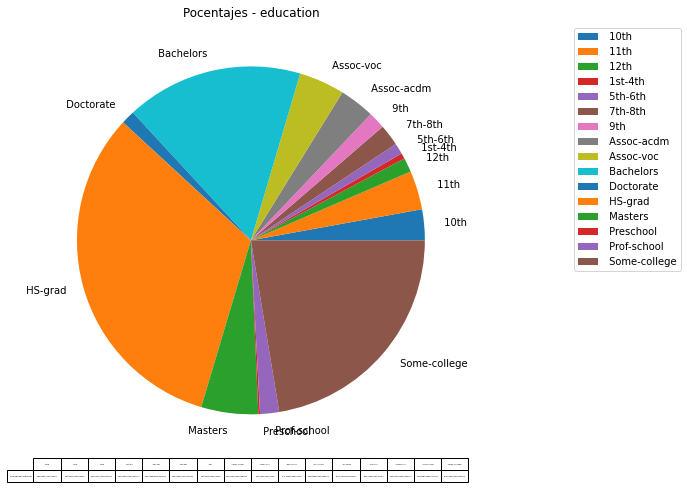

In [21]:
Resultados_education_Porcentaje = Resultados_education * 100

Resultados_education_Porcentaje.plot(
    kind='pie', 
    subplots=True, 
    figsize=(8, 8), 
    table=True)

plt.title("Pocentajes - education")
plt.ylabel("")
plt.legend(loc='best', bbox_to_anchor=(1.5, 1))
plt.show()

Si queremos saber la probabilidad de los encuestados de acuerdo a su estados civil, realizamos la siguiente operación:

In [22]:
Prob_Marginal_martial = suma_Columnas/Suma_Total_Columnas
Resultados_martial = pd.DataFrame(
    data = Prob_Marginal_martial, 
    columns = ['Probabilidad Marginal'])

display(Resultados_martial)

,Probabilidad Marginal
marital-status,
Divorced,0.136452
Married-AF-spouse,0.000706
Married-civ-spouse,0.459937
Married-spouse-absent,0.012837
Never-married,0.328092
Separated,0.031479
Widowed,0.030497


In [23]:
print("La suma de las probabilidades marginales de nivel de educación es: ", Resultados_education.sum())
print("La suma de las probabilidades marginales de acuerdo al estado civil es: ", Resultados_martial.sum())

La suma de las probabilidades marginales de nivel de educación es:  Probabilidad Marginal    1.0
dtype: float64
La suma de las probabilidades marginales de acuerdo al estado civil es:  Probabilidad Marginal    1.0
dtype: float64


**Conclusión 2:** El 45.99 % de los encuestados están casados pero hay un 32.8 % de los encuestados que están solteros. 

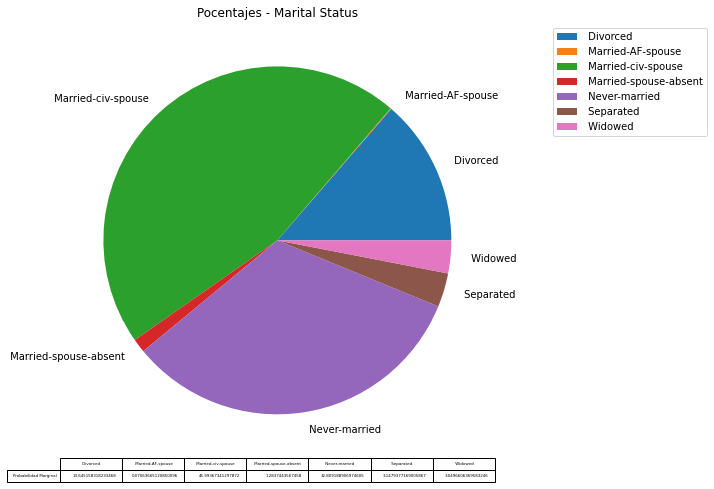

In [24]:
Resultados_martial_Porcentaje = Resultados_martial * 100

Resultados_martial_Porcentaje.plot(
    kind='pie', 
    subplots=True, 
    figsize=(8, 8), 
    table = True, 
    legend = True)

plt.title("Pocentajes - Marital Status")
plt.ylabel("")
plt.legend(loc='best', bbox_to_anchor=(1.5, 1))
plt.show()

## Distribución Condicional

Recordando que la probabilidad condicional es la probabilidad de un evento $A$ dado un evento $B$ que ocurrío a priori:

$$\mathbb{P}(A\vert B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$$

Vamos a considerar dos variables aleatorias $X$ e $Y$ con una probabilidad conjunta que simbolizaremos como $f_{XY}(x,y)$. A partir de la probabilidad conjunta, la *distribución condicional* de $Y$ dado $X = x$, se expresa como:

$$f_{Y\vert x}(y) = \frac{f_{XY}(x,y)}{f_X (x)}$$

Esta expresión determina que la distribución condicional es la probabilidad conjunta de $X$ e $Y$ sobre la distribución marginal, que simbolizaremos como $f_X (x)$, siendo que $f_X (x) > 0$. 

Otra forma de expresar la distribución condicional es cuando se desea conocer la probabilidad de $X$ dado $Y = y$:

$$f_{X\vert y}(x) = \frac{f_{XY}(x,y)}{f_Y (y)}$$

Veamos un ejemplo práctico de esta distribución, considerando el ejemplo anterior de las baterías:

### Ejemplo de la distribución condicional con una tabla de contingencia basado en valores de producción de café

El primer paso es construir una matriz de probabilidades marginales

In [25]:
display(Datos)

,San Alberto,Delolita,Al alma,Revolucion
Cafe Especial,120,400,160,199
Cafe Premium,50,85,81,69


In [26]:
display(suma_Filas_Cafe)
display(suma_Columnas_Cafe)

,Suma Filas
Cafe Especial,879
Cafe Premium,285


,Suma Columnas
San Alberto,170
Delolita,485
Al alma,241
Revolucion,268


In [27]:
concatenar_filas = pd.concat([Datos, suma_Filas_Cafe], axis = 1)
display(concatenar_filas)

,San Alberto,Delolita,Al alma,Revolucion,Suma Filas
Cafe Especial,120,400,160,199,879
Cafe Premium,50,85,81,69,285


In [28]:
concatenar_columnas = pd.concat([concatenar_filas, suma_Columnas_Cafe.T], axis = 0)
display(concatenar_columnas)

,San Alberto,Delolita,Al alma,Revolucion,Suma Filas
Cafe Especial,120,400,160,199,879.0
Cafe Premium,50,85,81,69,285.0
Suma Columnas,170,485,241,268,NaN


In [29]:
concatenar_columnas = concatenar_columnas.fillna(suma_Filas_Cafe.sum())
display(concatenar_columnas)

,San Alberto,Delolita,Al alma,Revolucion,Suma Filas
Cafe Especial,120,400,160,199,879.0
Cafe Premium,50,85,81,69,285.0
Suma Columnas,170,485,241,268,1164.0


A partir de la tabla anterior, se calculan las probabilidades marginales de cada elemento de la tabla

In [30]:
Probabilidades_Marginales_Total = concatenar_columnas / concatenar_columnas.loc['Suma Columnas']['Suma Filas']
display(Probabilidades_Marginales_Total) 

,San Alberto,Delolita,Al alma,Revolucion,Suma Filas
Cafe Especial,0.103093,0.343643,0.137457,0.170962,0.755155
Cafe Premium,0.042955,0.073024,0.069588,0.059278,0.244845
Suma Columnas,0.146048,0.416667,0.207045,0.230241,1.000000


Una vez que se obtiene la matriz de probabilidades marginales, procedemos a calcular la matriz de probabilidades condicionales

**Caso 1**: $\frac{\mathbf{P}(X = San Alberto, \, Y = Cafe Especial)}{\mathbf{P}(Y = Cafe Especial)}$

In [31]:
P_San_Alberto_Cafe_Especial = Probabilidades_Marginales_Total.loc['Cafe Especial', 'San Alberto'] / Probabilidades_Marginales_Total.loc['Cafe Especial', 'Suma Filas']
print("P(X = San Alberto, Y = Cafe Especial)/P(Y = Cafe Especial) = ", P_San_Alberto_Cafe_Especial)

P(X = San Alberto, Y = Cafe Especial)/P(Y = Cafe Especial) =  0.13651877133105803


**Caso 2**: $\frac{\mathbf{P}(X = Delolita, \, Y = Cafe Especial)}{\mathbf{P}(Y = Cafe Especial)}$

In [32]:
P_Delolita_Cafe_Especial = Probabilidades_Marginales_Total.loc['Cafe Especial', 'Delolita'] / Probabilidades_Marginales_Total.loc['Cafe Especial', 'Suma Filas']
print("P(X = Delolita, Y = Cafe Especial)/P(Y = Cafe Especial) = ", P_Delolita_Cafe_Especial)

P(X = Delolita, Y = Cafe Especial)/P(Y = Cafe Especial) =  0.45506257110352677


**Caso 3**: $\frac{\mathbf{P}(X = Al alma, \, Y = Cafe Especial)}{\mathbf{P}(Y = Cafe Especial)}$

In [33]:
P_Al_alma_Cafe_Especial = Probabilidades_Marginales_Total.loc['Cafe Especial']['Al alma']/Probabilidades_Marginales_Total.loc['Cafe Especial']['Suma Filas']
print("P(X = Al alma, Y = Cafe Especial)/P(Y = Cafe Especial) = ", P_Al_alma_Cafe_Especial)

P(X = Al alma, Y = Cafe Especial)/P(Y = Cafe Especial) =  0.18202502844141072


**Caso 4**: $\frac{\mathbf{P}(X = Revolucion, \, Y = Cafe Especial)}{\mathbf{P}(Y = Cafe Especial)}$

In [34]:
P_Revolucion_Cafe_Especial = Probabilidades_Marginales_Total.loc['Cafe Especial']['Revolucion']/Probabilidades_Marginales_Total.loc['Cafe Especial']['Suma Filas']
print("P(X = Revolucion, Y = Cafe Especial)/P(Y = Cafe Especial) = ", P_Revolucion_Cafe_Especial)

P(X = Revolucion, Y = Cafe Especial)/P(Y = Cafe Especial) =  0.22639362912400457


**Caso 5**: $\frac{\mathbf{P}(X = San Alberto, \, Y = Cafe Premium)}{\mathbf{P}(Y = Cafe Premium)}$

In [35]:
P_San_Alberto_Cafe_Premium = Probabilidades_Marginales_Total.loc['Cafe Premium']['San Alberto']/Probabilidades_Marginales_Total.loc['Cafe Premium']['Suma Filas']
print("P(X = San Alberto, Y = Cafe Premium)/P(Y = Cafe Premium) = ", P_San_Alberto_Cafe_Premium)

P(X = San Alberto, Y = Cafe Premium)/P(Y = Cafe Premium) =  0.1754385964912281


**Caso 6**: $\frac{\mathbf{P}(X = Delolita, \, Y = Cafe Premium)}{\mathbf{P}(Y = Cafe Premium)}$

In [36]:
P_Delolita_Cafe_Premium = Probabilidades_Marginales_Total.loc['Cafe Premium']['Delolita']/Probabilidades_Marginales_Total.loc['Cafe Premium']['Suma Filas']
print("P(X = Delolita, Y = Cafe Premium)/P(Y = Cafe Premium) = ", P_Delolita_Cafe_Premium)

P(X = Delolita, Y = Cafe Premium)/P(Y = Cafe Premium) =  0.29824561403508776


**Caso 7**: $\frac{\mathbf{P}(X = Al alma, \, Y = Cafe Premium)}{\mathbf{P}(Y = Cafe Premium)}$

In [37]:
P_Alalma_Cafe_Premium = Probabilidades_Marginales_Total.loc['Cafe Premium']['Al alma']/Probabilidades_Marginales_Total.loc['Cafe Premium']['Suma Filas']
print("P(X = Al alma, Y = Cafe Premium)/P(Y = Cafe Premium) = ", P_Alalma_Cafe_Premium)

P(X = Al alma, Y = Cafe Premium)/P(Y = Cafe Premium) =  0.28421052631578947


**Caso 8**: $\frac{\mathbf{P}(X = Revolucion, \, Y = Cafe Premium)}{\mathbf{P}(Y = Cafe Premium)}$

In [38]:
P_Revolucion_Cafe_Premium = Probabilidades_Marginales_Total.loc['Cafe Premium']['Revolucion']/Probabilidades_Marginales_Total.loc['Cafe Premium']['Suma Filas']
print("P(X = Revolucion, Y = Cafe Premium)/P(Y = Cafe Premium) = ", P_Revolucion_Cafe_Premium)

P(X = Revolucion, Y = Cafe Premium)/P(Y = Cafe Premium) =  0.24210526315789474


A partir del cálculo de las probabilidades condicionales, vamos a construir una tabla de probabilidad condicionales para facilitar su interpretación.

In [39]:
Fila_1 = np.hstack([P_San_Alberto_Cafe_Especial, P_Delolita_Cafe_Especial, P_Al_alma_Cafe_Especial, P_Revolucion_Cafe_Especial])
Fila_2 = np.hstack([P_San_Alberto_Cafe_Premium, P_Delolita_Cafe_Premium, P_Alalma_Cafe_Premium, P_Revolucion_Cafe_Premium])
Tabla_Probabilidades_Condicionales = np.vstack([Fila_1,Fila_2])
Tabla_Probabilidades_Condicionales = pd.DataFrame(Tabla_Probabilidades_Condicionales, index =['Cafe Especial', 'Cafe Premium'], columns = ['San Alberto', 'De lolita', 'Al alma', 'Revolucion'])
display(Tabla_Probabilidades_Condicionales)

,San Alberto,De lolita,Al alma,Revolucion
Cafe Especial,0.136519,0.455063,0.182025,0.226394
Cafe Premium,0.175439,0.298246,0.284211,0.242105


In [40]:
print('Suma de las probabilidades condicionales para el Cafe Especial = ', Tabla_Probabilidades_Condicionales.loc['Cafe Especial'].sum())
print('Suma de las probabilidades condicionales para el Cafe Premium = ', Tabla_Probabilidades_Condicionales.loc['Cafe Premium'].sum())

Suma de las probabilidades condicionales para el Cafe Especial =  1.0
Suma de las probabilidades condicionales para el Cafe Premium =  1.0


Método alternativo para calcular la tabla de probabilidades condicionales

In [41]:
Prob_Marginales = Probabilidades_Marginales_Total.values
Prob_Cond = []
Longitud = Prob_Marginales.shape[0] - 1

for x in range(Longitud):
    pcond = Prob_Marginales[x,:]/Prob_Marginales[x,Prob_Marginales.shape[1]-1]
    Prob_Cond.append(pcond)

Prob_Cond = pd.DataFrame(Prob_Cond, index =['Cafe Especial', 'Cafe Premium'], columns = ['San Alberto', 'De lolita', 'Al alma', 'Revolucion', 'Suma Probalidades Condicionales'])
display(Prob_Cond)

,San Alberto,De lolita,Al alma,Revolucion,Suma Probalidades Condicionales
Cafe Especial,0.136519,0.455063,0.182025,0.226394,1.0
Cafe Premium,0.175439,0.298246,0.284211,0.242105,1.0


### Aplicación de la distribución condicional con la tabla de contingencia generada desde la base de datos

En este apartado, vamos a aplicar la tabla de contingencia de nuestra base de datos para encontrar la matriz de probabilidades condicionales

In [42]:
display(contingencia_education_marital)

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
education,,,,,,,
10th,120,0,349,15,361,49,39
11th,130,0,354,19,586,48,38
12th,39,0,130,8,232,14,10
1st-4th,10,0,81,12,39,9,17
5th-6th,20,0,172,20,89,18,14
7th-8th,73,0,359,14,113,23,64
9th,64,0,230,9,155,33,23
Assoc-acdm,203,2,460,12,337,30,23
Assoc-voc,234,1,689,13,362,42,41


In [43]:
Categorias_Marital = [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', 
                      ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
Categorias_Education = [' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', 
                        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', 
                        ' HS-grad', ' Masters',
                        ' Preschool', ' Prof-school', ' Some-college'] 

Vamos a construir una tabla que incluya la suma de filas y columnas

In [44]:
Suma_Filas = contingencia_education_marital.sum(axis = 1)
Suma_Filas = pd.DataFrame(Suma_Filas, columns = ['Suma Filas'])
Suma_Columnas = contingencia_education_marital.sum(axis = 0)
Suma_Columna = pd.DataFrame(Suma_Columnas, columns = ['Suma Columnas'])
contingencia_1 = pd.concat([contingencia_education_marital, Suma_Filas], axis = 1)
contingencia_2 = pd.concat([contingencia_1, Suma_Columna.T], axis = 0)
display(contingencia_2)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Suma Filas
10th,120,0,349,15,361,49,39,933.0
11th,130,0,354,19,586,48,38,1175.0
12th,39,0,130,8,232,14,10,433.0
1st-4th,10,0,81,12,39,9,17,168.0
5th-6th,20,0,172,20,89,18,14,333.0
7th-8th,73,0,359,14,113,23,64,646.0
9th,64,0,230,9,155,33,23,514.0
Assoc-acdm,203,2,460,12,337,30,23,1067.0
Assoc-voc,234,1,689,13,362,42,41,1382.0
Bachelors,546,4,2768,68,1795,92,82,5355.0


In [45]:
contingencia_2 = contingencia_2.fillna(Suma_Filas.sum())
display(contingencia_2)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Suma Filas
10th,120,0,349,15,361,49,39,933.0
11th,130,0,354,19,586,48,38,1175.0
12th,39,0,130,8,232,14,10,433.0
1st-4th,10,0,81,12,39,9,17,168.0
5th-6th,20,0,172,20,89,18,14,333.0
7th-8th,73,0,359,14,113,23,64,646.0
9th,64,0,230,9,155,33,23,514.0
Assoc-acdm,203,2,460,12,337,30,23,1067.0
Assoc-voc,234,1,689,13,362,42,41,1382.0
Bachelors,546,4,2768,68,1795,92,82,5355.0


Calculando la matriz de probabilidades marginales

In [46]:
Probabilidades_Marginales_education_marital = contingencia_2/contingencia_2.loc['Suma Columnas']['Suma Filas']
display(Probabilidades_Marginales_education_marital) 

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Suma Filas
10th,0.003685,0.000000,0.010718,0.000461,0.011087,0.001505,0.001198,0.028654
11th,0.003993,0.000000,0.010872,0.000584,0.017997,0.001474,0.001167,0.036086
12th,0.001198,0.000000,0.003993,0.000246,0.007125,0.000430,0.000307,0.013298
1st-4th,0.000307,0.000000,0.002488,0.000369,0.001198,0.000276,0.000522,0.005160
5th-6th,0.000614,0.000000,0.005282,0.000614,0.002733,0.000553,0.000430,0.010227
7th-8th,0.002242,0.000000,0.011025,0.000430,0.003470,0.000706,0.001966,0.019840
9th,0.001966,0.000000,0.007064,0.000276,0.004760,0.001013,0.000706,0.015786
Assoc-acdm,0.006234,0.000061,0.014127,0.000369,0.010350,0.000921,0.000706,0.032769
Assoc-voc,0.007187,0.000031,0.021160,0.000399,0.011118,0.001290,0.001259,0.042443
Bachelors,0.016769,0.000123,0.085010,0.002088,0.055127,0.002825,0.002518,0.164461


Generando la matriz de probabilidades condicionales

In [47]:
Categorias_Education = [' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
                        ' Preschool', ' Prof-school', ' Some-college']
Categorias_Marital = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed', 'Suma de Probabilidades Condicionales']     

In [48]:
Prob_Marginales = Probabilidades_Marginales_education_marital.values
Prob_Cond = []
Longitud = Prob_Marginales.shape[0] - 1

for x in range(Longitud):
    pcond = Prob_Marginales[x, :] / Prob_Marginales[x, Prob_Marginales.shape[1] - 1]
    Prob_Cond.append(pcond)

Prob_Cond_education_martial = pd.DataFrame(
    Prob_Cond, 
    index=Categorias_Education, 
    columns=Categorias_Marital)

display(Prob_Cond_education_martial)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Suma de Probabilidades Condicionales
10th,0.128617,0.000000,0.374062,0.016077,0.386924,0.052519,0.041801,1.0
11th,0.110638,0.000000,0.301277,0.016170,0.498723,0.040851,0.032340,1.0
12th,0.090069,0.000000,0.300231,0.018476,0.535797,0.032333,0.023095,1.0
1st-4th,0.059524,0.000000,0.482143,0.071429,0.232143,0.053571,0.101190,1.0
5th-6th,0.060060,0.000000,0.516517,0.060060,0.267267,0.054054,0.042042,1.0
7th-8th,0.113003,0.000000,0.555728,0.021672,0.174923,0.035604,0.099071,1.0
9th,0.124514,0.000000,0.447471,0.017510,0.301556,0.064202,0.044747,1.0
Assoc-acdm,0.190253,0.001874,0.431115,0.011246,0.315839,0.028116,0.021556,1.0
Assoc-voc,0.169320,0.000724,0.498553,0.009407,0.261939,0.030391,0.029667,1.0
Bachelors,0.101961,0.000747,0.516900,0.012698,0.335201,0.017180,0.015313,1.0


Analizando los resultados de la matriz de Probabilidades Condicionales

In [49]:
Prob_Cond_education_martial = Prob_Cond_education_martial[['Divorced', 'Married-AF-spouse',	
                                                           'Married-civ-spouse', 'Married-spouse-absent',	
                                                           'Never-married', 'Separated',	'Widowed']]  

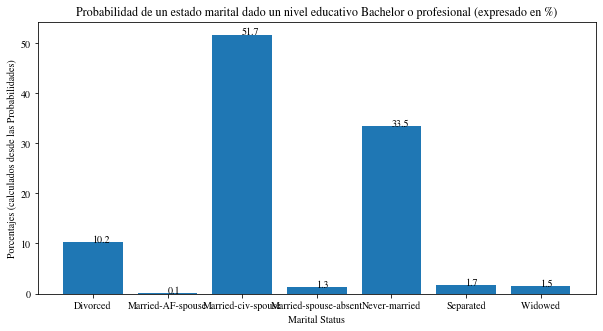

In [50]:
matplotlib.rcParams.update(
    {
        'font.size': 10, 
        'font.family': 'STIXGeneral', 
        'mathtext.fontset': 'stix'
    }
)

plt.figure(figsize=(10, 5))

plt.bar(x = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed'], 
        data = Prob_Cond_education_martial.loc[' Bachelors'], height = 100*Prob_Cond_education_martial.loc[' Bachelors'])

categorias = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed']
Prob_Cond_education_cad = 100*Prob_Cond_education_martial.loc[' Bachelors']
y = np.arange(0,Prob_Cond_education_cad.shape[0])

for index, value in enumerate(y):
    plt.text(index, round(Prob_Cond_education_cad[index], 1), str(round(Prob_Cond_education_cad[index], 1)))

plt.xlabel("Marital Status")
plt.ylabel("Porcentajes (calculados desde las Probabilidades)")
plt.title("Probabilidad de un estado marital dado un nivel educativo Bachelor o profesional (expresado en %)")
plt.show()

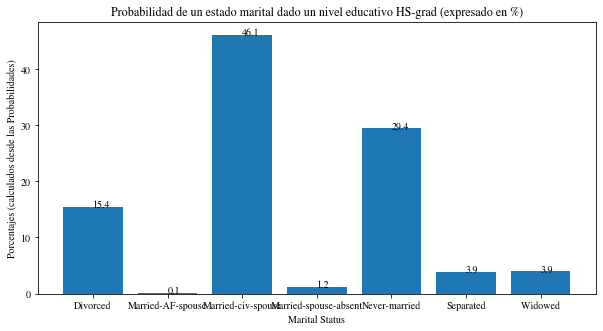

In [51]:
matplotlib.rcParams.update({'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(10, 5))

plt.bar(x = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed'], 
        data = Prob_Cond_education_martial.loc[' HS-grad'], height = 100*Prob_Cond_education_martial.loc[' HS-grad'])

categorias = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed']
Prob_Cond_education_cad = 100*Prob_Cond_education_martial.loc[' HS-grad']
y = np.arange(0,Prob_Cond_education_cad.shape[0])

for index, value in enumerate(y):
    plt.text(index, round(Prob_Cond_education_cad[index], 1), str(round(Prob_Cond_education_cad[index], 1)))

plt.xlabel("Marital Status")
plt.ylabel("Porcentajes (calculados desde las Probabilidades)")
plt.title("Probabilidad de un estado marital dado un nivel educativo HS-grad (expresado en %)")
plt.show()

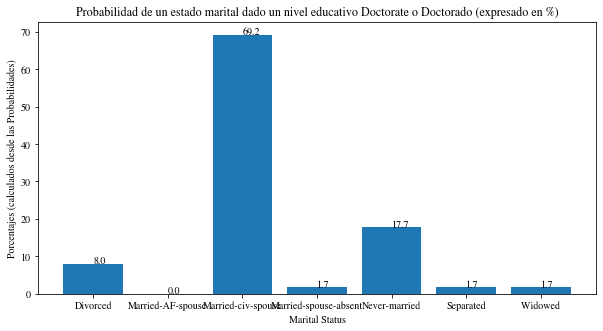

In [52]:
matplotlib.rcParams.update({'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(10, 5))

plt.bar(x = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed'], 
        data = Prob_Cond_education_martial.loc[' Doctorate'], height = 100*Prob_Cond_education_martial.loc[' Doctorate'])

categorias = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed']
Prob_Cond_education_cad = 100*Prob_Cond_education_martial.loc[' Doctorate']
y = np.arange(0,Prob_Cond_education_cad.shape[0])

for index, value in enumerate(y):
    plt.text(index, round(Prob_Cond_education_cad[index], 1), str(round(Prob_Cond_education_cad[index], 1)))

plt.xlabel("Marital Status")
plt.ylabel("Porcentajes (calculados desde las Probabilidades)")
plt.title("Probabilidad de un estado marital dado un nivel educativo Doctorate o Doctorado (expresado en %)")
plt.show()

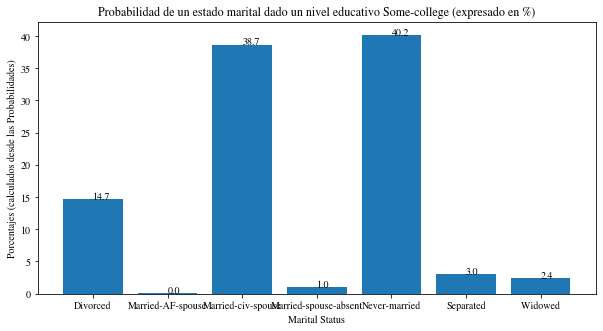

In [53]:
matplotlib.rcParams.update({'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(10, 5))

plt.bar(x = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed'], 
        data = Prob_Cond_education_martial.loc[' Some-college'], height = 100*Prob_Cond_education_martial.loc[' Some-college'])

categorias = ['Divorced', 'Married-AF-spouse',	'Married-civ-spouse', 'Married-spouse-absent',	'Never-married', 'Separated',	'Widowed']
Prob_Cond_education_cad = 100*Prob_Cond_education_martial.loc[' Some-college']
y = np.arange(0,Prob_Cond_education_cad.shape[0])

for index, value in enumerate(y):
    plt.text(index, round(Prob_Cond_education_cad[index], 1), str(round(Prob_Cond_education_cad[index], 1)))

plt.xlabel("Marital Status")
plt.ylabel("Porcentajes (calculados desde las Probabilidades)")
plt.title("Probabilidad de un estado marital dado un nivel educativo Some-college (expresado en %)")
plt.show()

## Test Exacto de Fisher

El test exacto de Fischer calcula la probabilidad de una entrada particular de una **tabla de contingencia**, condicionado por filas de valores marginales y columna de sumas de valores. Considerando que este test considera una tabla de contingencia, dicha tabla es una representación de la partición de una muestra poblacional de dos categorías entre dos diferentes clasificaciones, como se muestra en la tabla ejemplo:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|

La pregunta que se formula a partir de esta tabla es la siguiente: la tabla corresponde o no a una partición aleatoria de la muestra poblacional, condensado por sumas marginales. Note que debido a esta tabla de 2x2, un cambio de algún valor automáticamente afecta todo los valores restantes de las sumas. Para analizar este tipo de casos, el test exacto de Fisher permite resolver esta inquietud, mediante una **distribución hipérgeométrica**:

$$\mathbb{P}(X = k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$

donde:

*   $\mathbb{P}(X = k) = \mathbb{P}(X_{i,j} \vert r_1,r_2,c_1,c_2)$ es la probabilidad de un valor particular de la tabla de contingencia, siendo $i,j$ una ubicación de una celda de la tabla, $r_1$ es la suma de la primera fila, $r2$ es la suma de la segunda fila, $c_!$ es la suma de la primera columna y $c_2$ es la suma de la segunda columna.
*   $N$ es el tamaño de la población.
*   $K$ es el número total de posibles valores favorables.
*   $n$ es el número de valores favorables.
*   $k$ es el número de valores favorables observados.

Por convención, $K = r_1$, $k = x$, $n = c_1$ y $N = c_1 + c_2$. 

Seleccionando dos columnas de la base de datos que contengan solo dos categorías

In [54]:
Categorias_gender = pd.Categorical(data['gender']).unique()
display(Categorias_gender)

[' Male', ' Female']
Categories (2, object): [' Female', ' Male']

In [55]:
Categorias_income = pd.Categorical(data['income']).unique()
display(Categorias_income)

[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']

In [56]:
datos_select = data[['gender','income']]
display(datos_select)

,gender,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
...,...,...
32556,Female,<=50K
32557,Male,>50K
32558,Female,<=50K
32559,Male,<=50K


A partir de los datos seleccionados, vamos a generar una tabla de contingencia de 2 x 2:

In [57]:
contingencia_gender_income = pd.crosstab(datos_select['gender'], datos_select['income'])
display(contingencia_gender_income)

income,<=50K,>50K
gender,,
Female,9592,1179
Male,15128,6662


Ahora vamos a sumar las filas y las columnas de la tabla de contingencia:

In [58]:
Suma_Filas = contingencia_gender_income.sum(axis = 1)
Suma_Filas = pd.DataFrame(Suma_Filas, columns = ['Suma Filas'])
Suma_Columnas = contingencia_gender_income.sum(axis = 0)
Suma_Columna = pd.DataFrame(Suma_Columnas, columns = ['Suma Columnas'])
contingencia_1 = pd.concat([contingencia_gender_income, Suma_Filas], axis = 1)
contingencia_2 = pd.concat([contingencia_1, Suma_Columna.T], axis = 0)
display(contingencia_2)

,<=50K,>50K,Suma Filas
Female,9592,1179,10771.0
Male,15128,6662,21790.0
Suma Columnas,24720,7841,NaN


In [59]:
contingencia_2 = contingencia_2.fillna(Suma_Filas.sum())
display(contingencia_2)

,<=50K,>50K,Suma Filas
Female,9592,1179,10771.0
Male,15128,6662,21790.0
Suma Columnas,24720,7841,32561.0


Considerando esta tabla, se observa que 24720 hombres y mujeres de la población total de 32561 encuestados tienen ingresos anuales por debajo de 50K, y 7841 hombres y mujeres de la población total de encuestados tienen ingresos anuales por encima de 50K. Asumiendo la hipótesis nula de que los encuestados tienen la misma probabilidad de tener ingresos inferiores o superiores a 50K, 
¿Los encuestados se distribuirían tan desigualmente entre ingresos inferiores o superiores a 50K?

*   $H_0$ : Las variables son independientes por lo que una variable no varía entre los distintos niveles de la otra variable.
*   $H_A$: Las variables son dependientes, una variable varía entre los distintos niveles de la otra variable.

A partir de la tabla de contingencia, vamos a aplicar el test exacto de Fisher para responder a esa pregunta:

In [60]:
tasa_pares_1, p_valor_1 = fisher_exact(
    contingencia_gender_income, 
    alternative = 'two-sided')

resultado_Fisher = pd.DataFrame(
    np.array([tasa_pares_1, p_valor_1]).reshape(1, 2), 
    index=['two-sided'], 
    columns=['Tasa Fisher', 'Valor-p']
)

display(resultado_Fisher)

,Tasa Fisher,Valor-p
two-sided,3.582766,0.0


Centrando nuestro interés en el valor p usando la opción **two-sided**, el test estimó un valor p de 0.0. Este resultado indica que la tabla de contingencia es estadísticamente significativo y hay evidencias para rechazar la $H_0$, lo cual los generos de los encuestados son dependientes de los ingresos que reciben anualmente. Por consiguiente, los encuestados si se distribuirían tan desigualmente entre ingresos inferiores o superiores a 50K 

## Test Chi-Cuadrada

El test Chi-Cuadrada evalua las relaciones entre dos o más variables categóricas, implicando un cálculo de la distribución chi-cuadrada de las probabilidades que se desean encontrar a partir de la tabla de contingencia. En la literatura, hay varios tipos de test chi-cuadrada:

1.   **Test chi-cuadrada para la independencia entre variables.**
2.   Test chi-cuadrada para la igualdad de proporciones.
3.   Test chi-cuadrada para la bondad del ajuste.


### Test chi-cuadrada para la independencia entre variables

Este tipo de test es aplicable para un análisis bivariable nominales y determina si es rechazable la hipótesis que dos variables son independientes o no. Bajo una hipótesis nula se determinan los casos en el supuesto de variables son independientes. Los valores esperados se determinan con probabilidades marginales de las categorías. A partir de estas probabilidades, el test $\mathcal{X}^2$ mide la diferencia entre los valores esperados y los valores observados, de acuerdo al grado de libertad de la distribución chi-cuadrada:

$$\mathcal{X}^2 = \sum_{i=1}^{p_1} \sum_{j=1}^{p_2} \frac{(E_{i,j} - O_{i,j})^2}{E_{i,j}}$$

siendo $E_{i,j}$ y $O_{i,j}$ el valor esperado y el valor observado entre una fila $i$ con respecto a una columna $j$. Esta expresión esta bajo el supuesto de la hipótesis nula que sigue una distribución chi-cuadrada. Si no se cumple la hipótesis nula, entonces las variables son dependientes entre sí.

Para calcular $E_{i,j}$, se realiza la siguiente operación matemática:

$$E_{i,j} = \frac{Total_{filas}xTotal_{Columnas}}{Total_{filas\,\, y\,\, columnas}}$$

Consideremos la tabla de contingencia usada en el test exacto de Fisher (valores observados):

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|

$$E_{1,1} = \frac{24x25}{37} = 22.2$$
$$E_{1,2} = \frac{24x12}{37} = 7.78$$
$$E_{2,1} = \frac{13x25}{37} = 8.78$$
$$E_{2,2} = \frac{13x12}{37} = 4.21$$

Entonces la tabla de valores esperados es la siguiente:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|22.2|7.78|29.98|
|------------|------------|------------|------------|
|Camisas|8.78|4.21|12.99|
|------------|------------|------------|------------|
|Total|30.98|11.99|42.97|
|----------------|------------|------------|------------|

Teniendo en cuenta esa forma de operación, veamos como se aplica en Python

In [61]:
display(contingencia_2)

,<=50K,>50K,Suma Filas
Female,9592,1179,10771.0
Male,15128,6662,21790.0
Suma Columnas,24720,7841,32561.0


In [62]:
tabla_valores_esperados = []
valores_contingencia = np.asarray(contingencia_2.values)

for _,m in enumerate(np.arange(0, contingencia_2['Suma Filas'].shape[0] - 1)):
  for _,n in enumerate(np.arange(0, contingencia_2['Suma Filas'].shape[0] - 1)):
    E = valores_contingencia[m, contingencia_2.shape[0] - 1] * valores_contingencia[contingencia_2.shape[0] - 1, n] / contingencia_2.loc['Suma Columnas','Suma Filas']
    tabla_valores_esperados.append(E)

tabla_valores_esperados = np.asarray(tabla_valores_esperados)
tabla_valores_esperados = pd.DataFrame(tabla_valores_esperados.reshape(contingencia_2.shape[0] - 1,contingencia_2.shape[0] - 1), index = ['Female', 'Male'], columns = ['<=50K', '>50K'])
display(tabla_valores_esperados)

,<=50K,>50K
Female,8177.240257,2593.759743
Male,16542.759743,5247.240257


In [63]:
Suma_Filas = tabla_valores_esperados.sum(axis = 1)
Suma_Filas = pd.DataFrame(Suma_Filas, columns = ['Suma Filas'])
Suma_Columnas = tabla_valores_esperados.sum(axis = 0)
Suma_Columna = pd.DataFrame(Suma_Columnas, columns = ['Suma Columnas'])
contingencia_1_esperado = pd.concat([tabla_valores_esperados, Suma_Filas], axis = 1)
contingencia_2_esperado = pd.concat([contingencia_1_esperado, Suma_Columna.T], axis = 0)
display(contingencia_2_esperado)

,<=50K,>50K,Suma Filas
Female,8177.240257,2593.759743,10771.0
Male,16542.759743,5247.240257,21790.0
Suma Columnas,24720.000000,7841.000000,NaN


In [64]:
contingencia_2_esperado = contingencia_2_esperado.fillna(Suma_Filas.sum())
display(contingencia_2_esperado)

,<=50K,>50K,Suma Filas
Female,8177.240257,2593.759743,10771.0
Male,16542.759743,5247.240257,21790.0
Suma Columnas,24720.000000,7841.000000,32561.0


In [65]:
contingencia_gender_income

income,<=50K,>50K
gender,,
Female,9592,1179
Male,15128,6662


In [66]:
chi_valores, p_valores = chisquare(
    np.asarray(contingencia_gender_income.values), 
    f_exp = np.asarray(tabla_valores_esperados.values), 
    ddof = 0
) 
# ddof son los grados de libertad de la distribución chi-cuadrada
# Los grados de libertad dependen del número e filas y columnas de la tabla de contingencia
# Por ejemplo, Si f (filas) = 2 y c (columnas) = 2, entonces
# ddof = (f -1) x (c - 1)
# ddof = (2 - 1) x (2 - 1) = 1
# En Python ddof = 1 se representa como ddof = 0

In [76]:
resultados = pd.DataFrame(
    np.array([chi_valores, p_valores]).T, 
    index = ['Female / <=50K y >50k','Male / <=50K y >50k'], 
    columns = ['valor Chi-Cuadrada', 'Valor p']
)

display(resultados)

,valor Chi-Cuadrada,Valor p
Female / <=50K y >50k,365.762463,1.566215e-81
Male / <=50K y >50k,1153.124357,9.394065e-253


*   $H_0$: “La población de mujeres y hombres encuestados es *independiente* del ingreso anual”.
*   $H_A$: “La población de mujeres y hombres encuestados es *dependiente* del ingreso anual”.

Considerando que ambos casos de la tabla de resultados del test chi-cuadrado generan un valor p cercano a 0 que es menor a $\rho value = 0.05$, hay evidencias para rechazar $H_0$ y afirmar que la población de mujeres y hombres encuestados es dependiente del ingreso anual.

## Información Mutua para Datos Categóricos

En el tema del análisis de datos cuantitativos, se definio el concepto de entropía y entropía relativa para determinar la cantidad de información que aporta una relación entre características cuantitativas. Para el caso del análisis de los datos cualitativos, se puede analizar la tabla de contingencia desde la perspectiva de la teoría de la información mediante el uso de la información mutua. Por definición, la **información mutua (MI, en inglés)** es una medida de la entropía relativa entre las distribuciones condicionales de dos variables o características y el producto de sus distribuciones marginales. Mediante esta medición, se puede conocer la cantidad de información de una variable o característica con respecto a las observaciones o datos de otra variable o característica.

$$IM(X_1, X_2) = \sum_{X_1 = 1}^N \sum_{X_2 = 1}^N P(X_1 \vert X_2)log \left ( \frac{P(X_1 \vert X_2)}{P(X_1)P(X_2)}\right)$$

donde $X_1$ y $X_2$ son dos variables o características, $IM(X_1, X_2)$ es la información mutua entre $X_1$ y $X_2$, $P(X_1 \vert X_2)$ es la probabilidad condicional entre $X_1$ y $X_2$ y $P(X_1)$ y $P(X_2)$ son las probabilidades marginales de $X_1$ y $X_2$. 

Considerando $IM(X_1, X_2)$, se puede analizar dos casos:

1.   Si $P(X_1 \vert X_2) =  P(X_1)P(X_2)$, entonces $log(1) = 0$ y por consiguiente, $IM(X_1, X_2) = 0$. En este caso, no hay una relación entre $X_1$ y $X_2$ y se puede concluir ambas variables son independientes y **NO** se puede establecer si conociendo la probabilidad de $X_1$ puedo conocer más acerca de la probabilidad de $X_2$.
2.   Entre más grande sea $IM(X_1, X_2)$, se puede conocer más información de la probabilidad de $X_1$ con respecto la probabilidad de $X_2$. En este caso, se considera que ambas variables pueden aportar información valiosa para el análisis de datos.   

Teniendo en cuenta lo anterior, vamos a analizar la tabla de contingencia usada en los test Exacto de Fisher y el Test Chi-cuadrada para el caso de la información mutua:

In [68]:
display(contingencia_gender_income)

income,<=50K,>50K
gender,,
Female,9592,1179
Male,15128,6662


In [86]:
MI = mutual_info_score(labels_true=None, labels_pred=None, contingency=contingencia_gender_income)
print('El valor MI entre gender e income es = {:.4f}'.format(MI))

El valor MI entre gender e income es = 0.0258


Considerando el valor de MI, aunque es mayor que 0, su valor es muy bajo. Lo anterior indica que si conocemos la probabilidad de ingresos (income) entonces nosotros podemos conocer al menos una parte de la probabilidad del genero (gender). 

## Construcción de una Matriz de Información Mutua

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
Datos_Categoricos = data[['workclass', 'education', 'marital-status', 
                          'occupation', 'relationship', 'race', 'gender', 
                          'native-country', 'income']]
Datos_Categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   gender          32561 non-null  object
 7   native-country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [89]:
datos_array = Datos_Categoricos.values
features = np.arange(0,datos_array.shape[1])
MI = []

for d in features:
    for e in features:
        Tabla_Contingencia = crosstab(datos_array[:, d], datos_array[:, e])
        mi = mutual_info_score(labels_true=None, labels_pred=None, contingency=Tabla_Contingencia)
        MI.append(mi)

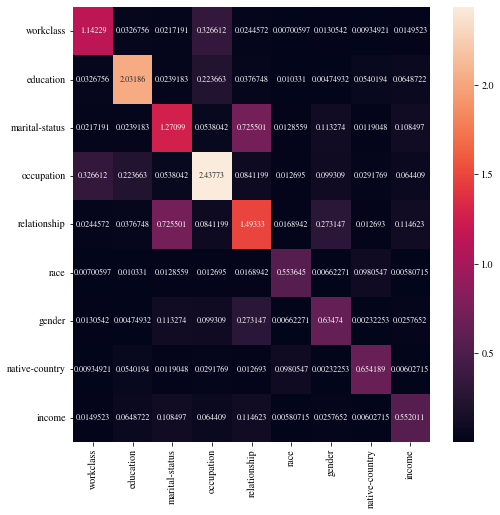

In [90]:
MI = np.asarray(MI)
MI = MI.reshape(datos_array.shape[1], datos_array.shape[1])

plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    MI, 
    annot=True, 
    fmt='g', 
    xticklabels=Datos_Categoricos.columns, 
    yticklabels=Datos_Categoricos.columns,
    annot_kws={"size": 8}
)
plt.show()

Observando la anterior matriz, la diagonal de la matriz de información mutua esta comparando una característica consigo mismo, lo cual el valor de la información mutua es alto. No obstante, como nos interesa analizar la relación entre características diferentes, la relación entre las variables *relationship* y *marital-status* genera un valor alto de información mutua, 0.725501. Lo anterior indica que si uno conoce la probabilidad de *relationship* se puede conocer bastante información de la probabilidad de *marital-status*. Este resultado nos puede indicar que los datos de *relationship* y *marital-status* muestran información muy similar entre ellas. Por consiguiente, se puede descartar una de las variables de la base de datos. 

In [74]:
pd.Categorical(Datos_Categoricos['relationship']).unique()

[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']
Categories (6, object): [' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife']

In [75]:
pd.Categorical(Datos_Categoricos['marital-status']).unique()

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Categories (7, object): [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']

Por otra parte, se encuentra un valor razonablemente considerable de la información mutua para las relaciones *occupation-workclass* y *occupation-education*. Observando que hay una variable en común, hay una sospecha que la información de *occupation* sea similar a *workclass* y *education*. No obstante, el valor más alto de MI, 0.326612, corresponde a *occupation-workclass*, lo cual desde el contexto de la base de datos son datos similares.

Por último, se encontró un valor de información mutua alta entre *gender* y *relationship* (MI(gender, relationship) = 0.273147). Lo anterior indica que probablemente los datos de *gender* y *relationship* pueden llegar a ser similares pero la elección de remover una de las variables o no dependerá del contexto de la base de datos.